In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.getcwd()

'/home/saifrais/w251/final_project/w251-accident-detection/code'

In [13]:
actual_df = pd.read_csv("/home/saifrais/w251/final_project/data/video_sample_labels_actuals_1fps.csv")
actual_df['vid_id'] = actual_df.url.str.replace('/home/saifrais/w251/final_project/data/video_sample_test/frames_1fps/','')
actual_df.head(1)

url  inference_time  \
0  /home/saifrais/w251/final_project/data/video_s...           0.723   

  label_pred     prob     label_act          note        vid_id  
0  collision  0.96761  no collision  title screen  vid_0001.jpg

In [ ]:
actual_df.label_act[actual_df.label_act=='no collision'].count()

##### ORIGINAL DATA - SPLIT BY FRAMES

In [67]:
#caffe_pred = pd.read_csv("/home/saifrais/w251/final_project/data/caffe_results.csv")
caffe_pred = pd.read_csv("/home/saifrais/w251/final_project/data/caffeemodel_wild_results_epoch15.csv")
caffe_pred['vid_id'] = caffe_pred.path.str.replace('/data/video_sample_test/frames_1fps/','')
caffe_pred.head(1)

path         class  prob  \
0  /data/video_sample_test/frames_1fps/vid_0052.jpg  no collision  0.78   

         vid_id  
0  vid_0052.jpg

## SKIP THIS ---
#### MODIFIED DATA - SPLIT BY VIDEO ID

In [30]:
caffe_pred = pd.read_csv("/home/saifrais/w251/final_project/data/caffe_results_v2.csv")
caffe_pred.rename(columns = {'Path':'path'}, inplace = True)
caffe_pred['vid_id'] = caffe_pred.path.str.replace('/data/video_sample_test/frames_1fps/','')
caffe_pred.head(1)

path         class  prob  \
0  /data/video_sample_test/frames_1fps/vid_0001.jpg  no collision  0.51   

         vid_id  
0  vid_0001.jpg

### ---

In [68]:
consol_df = pd.merge(actual_df,caffe_pred[['class','prob','vid_id']], on = "vid_id", how = "left")
consol_df.head(2)

url  inference_time  \
0  /home/saifrais/w251/final_project/data/video_s...           0.723   
1  /home/saifrais/w251/final_project/data/video_s...           0.724   

  label_pred   prob_x     label_act          note        vid_id         class  \
0  collision  0.96761  no collision  title screen  vid_0001.jpg  no collision   
1  collision  0.96795  no collision  title screen  vid_0002.jpg  no collision   

   prob_y  
0    0.74  
1    0.76

In [69]:
from sklearn import metrics
print(metrics.classification_report(consol_df['label_act'],consol_df['class']))

              precision    recall  f1-score   support

   collision       0.81      0.52      0.63       440
no collision       0.46      0.77      0.57       230

 avg / total       0.69      0.60      0.61       670



In [70]:
accuracy = metrics.accuracy_score(consol_df['label_act'],consol_df['class'])
precision = metrics.precision_score(consol_df['label_act'],consol_df['class'],average="binary", pos_label="collision")
recall = metrics.recall_score(consol_df['label_act'],consol_df['class'],average="binary", pos_label="collision")
f1 = metrics.f1_score(consol_df['label_act'],consol_df['class'],average="binary", pos_label="collision")

print("Accuracy:{:.3f} Precision:{:.3f} Recall:{:.3f} F1 score:{:.3f}".format(accuracy,precision,recall,f1))

Accuracy:0.604 Precision:0.811 Recall:0.518 F1 score:0.632


In [71]:
error_df = consol_df[consol_df['class']!=consol_df['label_act']]
error_df.shape

(265, 9)

In [72]:
error_df.head(1)

url  inference_time  \
9  /home/saifrais/w251/final_project/data/video_s...           0.706   

  label_pred   prob_x  label_act        note        vid_id         class  \
9  collision  0.98213  collision  car on car  vid_0010.jpg  no collision   

   prob_y  
9    0.93

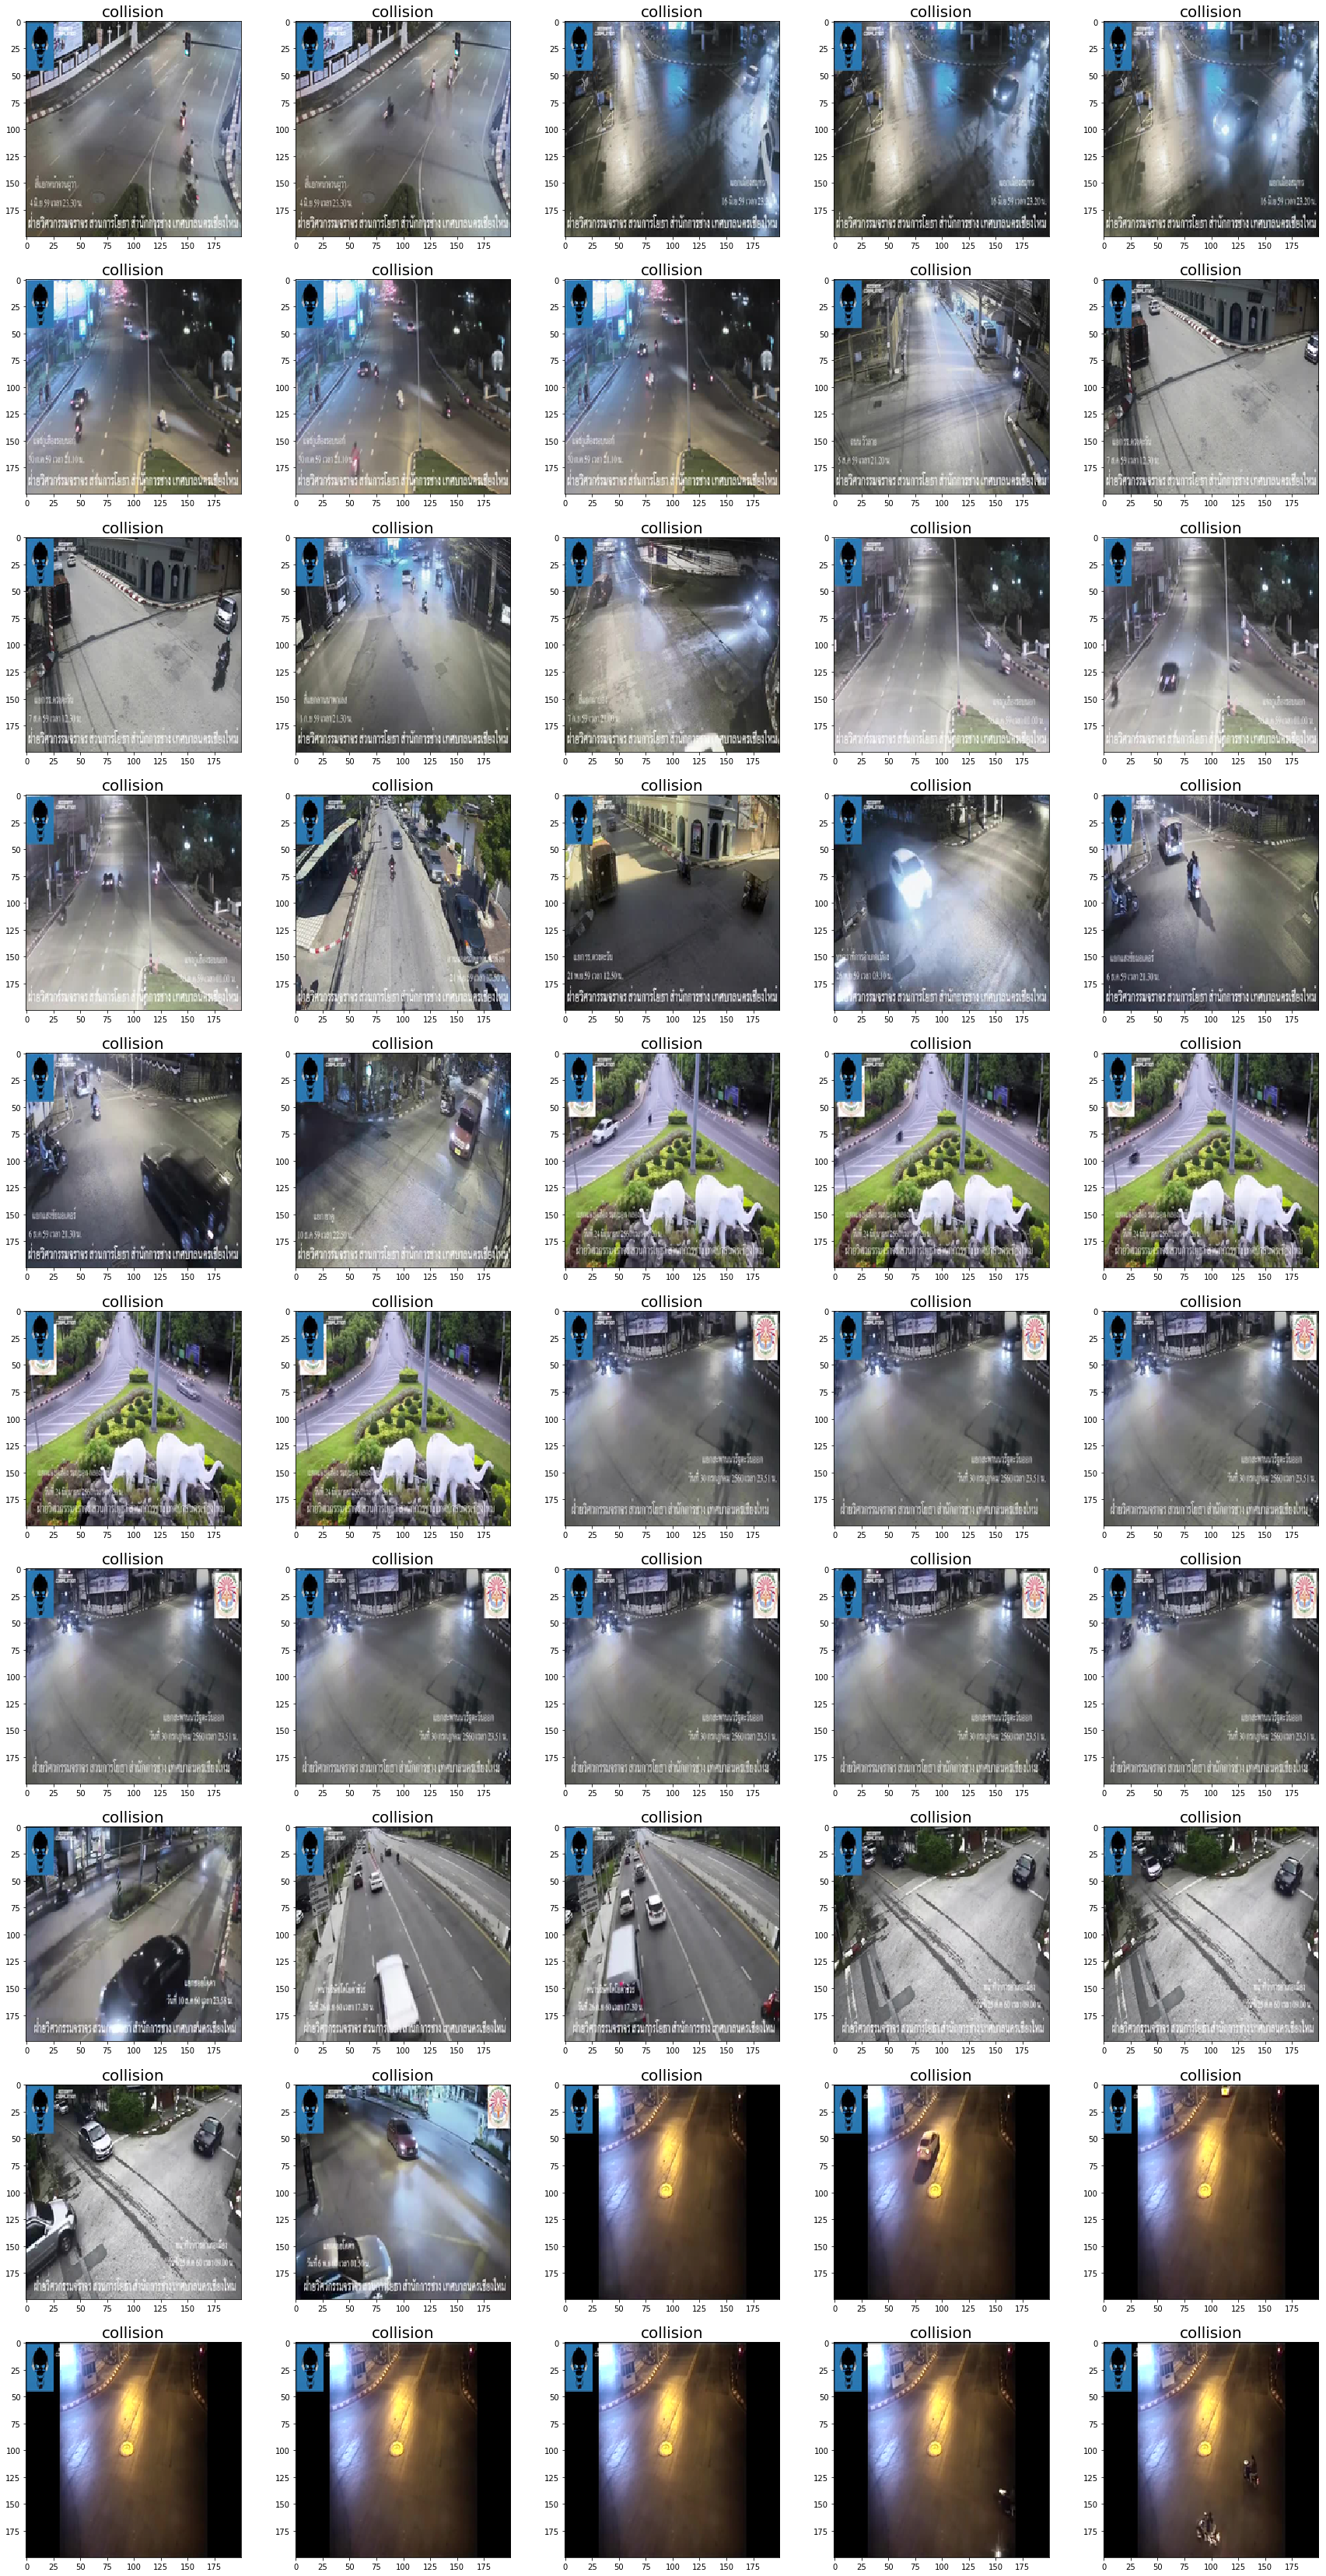

In [74]:
import matplotlib.pyplot as plt
from PIL import Image 
import os
import csv
from math import ceil
class_name = 'collision'
w,h = 200,200
fig = plt.figure(figsize=(30,60)) #original (30,30)
columns = 5
rows = 10 #original 5
for i in range(1, columns*rows + 1):
    ax = fig.add_subplot(rows, columns,i)
    img = Image.open(error_df[error_df['class']==class_name].iloc[i,0])
    img = img.resize((w,h), Image.ANTIALIAS)
    plt.imshow(img)
    ax.set_title(error_df[error_df['class']==class_name].iloc[i,7], fontsize=20)